<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/0322_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# kaggle -> 설정 -> API token받아와서 -> google drive mount하기 

In [2]:
! ls -1ha /content/drive/MyDrive/kaggle.json

/content/drive/MyDrive/kaggle.json


In [3]:
!mkdir -p ~/.kaggle # making dictory  / ~/.          /. -> 숨김폴더더



!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ #!mv(move)
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json 
#chmod 리눅스의 디렉토리/ 파일에 대한 권한 관리
# read(읽기) : 4, write(쓰기):2 , exe(실행): 1

! chmod 777#(read, wirte, exe) rxw: 권한이 다 있는 것,
#ex) chmod 750 # readwirte exe read exe -rwxr-x----


# 내가 참가한 대회 리스트 확인
!kaggle competitions list

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` chmod 777#(read, wirte, exe) rxw: 권한이 다 있는 것,'
ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000         98           False  
https://www.kaggle.com/competitions/asl-signs                                      2023-05-01 23:59:00  Research           $100,000        642           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        185           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-pr

In [4]:
!kaggle competitions download -c titanic

#drive 폴더에 zip파일이 업로드 됨 > zip파일 풀어야함

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
import seaborn as sns


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 탐색적 자료 분석(Exploratory Data Analysis(EDA)


 - survived : 생존=1, 죽음=0
 - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


##### titanic data는 분류문제, 회귀는 성능이 안나오나, 실행해 보기기

In [58]:
#test = pd.read_csv('test.csv')
#test.head()
print(test.columns.value_counts())
#test data에는 survived가 없음, 두개 합쳐서 나눠야 하나? 

PassengerId    1
Pclass         1
Name           1
Sex            1
Age            1
SibSp          1
Parch          1
Ticket         1
Fare           1
Cabin          1
Embarked       1
dtype: int64


In [59]:
train.columns.value_counts()

PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            1
SibSp          1
Parch          1
Ticket         1
Fare           1
Cabin          1
Embarked       1
dtype: int64

In [60]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [61]:
#데이터 프레임으로 만들기 
df_train = pd.DataFrame(data= train)
df_test = pd.DataFrame(data=test)

In [62]:
df_all = pd.concat([df_train, df_test], axis=0)
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df_all.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1.0       1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1.0       1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1.0       1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1.0       1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0.0       1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [64]:
df_all['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [65]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
#survived는 target값이니 drop
#그 밖에 필요없는 column들 드랍 ticket, cabin, passengerid
df_all2 = df_all.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], inplace= False)

#drop inplace True:드랍함

In [67]:
df_all2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [68]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_all2['target'] = [0]*df_train.shape[0] + [1]*df_test.shape[0]
df_all2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,target
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,0
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,0
4,3,male,35.0,0,0,8.0500,S,0


In [70]:
[0]*df_train.shape[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [71]:
feature_cols = df_all.columns.tolist()
feature_cols

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [72]:
feature_cols.remove('target')
target_col = 'target'

ValueError: ignored

In [ ]:
df_all

In [75]:
X = df_all[feature_cols]
y = df_all2['target']

In [76]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X.

In [81]:
y.value_counts()

0    891
1    418
Name: target, dtype: int64

In [83]:
#카테고리형을 수치형으로 변환하기 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])

In [ ]:
# data splilt 


In [ ]:
train.dtypes

In [ ]:
train_target = train['Survived']

In [ ]:
df_train = pd.DataFrame(data= train)

In [ ]:
df_train1 = df_train.drop(['Survived'], axis=1)
df_train1.head()

In [ ]:
df_train.head()

In [ ]:
train_target = df_train['Survived']
train_target.head()

In [ ]:
fig, ax = plt.subplots() #시각화 테이블을 불러오는 기본
ax.scatter(train['Age'], train['Fare']) #어떤 데이터를 활용해 그릴 것인지 선택(필자의 경우 Age와 Fare사용)
ax.set_title('Fare Based on Age') #Scatter Plot의 제목 설정
ax.set_xlabel('Age') #Scatter Plot의 X축 설정
ax.set_ylabel('Fare') #Scatter Plot의 Y축 설정

In [ ]:
df_train[df_train['Survived'] ==1]

In [ ]:
df_train[df_train['Survived'] ==1].value_counts()

In [ ]:
from matplotlib import rc
import matplotlib
import seaborn as sns

#rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
sns.heatmap(train.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2)
plt.show()

In [ ]:
pclass, Parch, SibSp, Fare

In [ ]:
sns.heatmap(df_train1.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2)
plt.show()

In [ ]:
test.head()

In [ ]:
train.head()

In [ ]:
df_train1.drop([''])

In [ ]:
df_train1.columns

In [ ]:
df_test = pd.DataFrame(data= test)
df_test.columns`

In [91]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

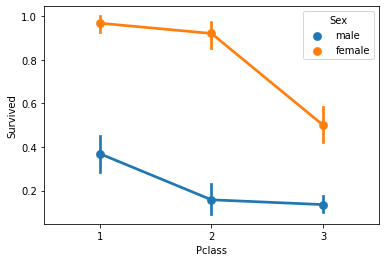

In [90]:
sns.pointplot(x = 'Pclass',y = 'Survived',hue='Sex',data=train)
plt.show()

In [84]:
print('Oldest Passenger was of:', train['Age'].max(), 'Years')
print('Youngest Passenger was of: ', train['Age'].min(), 'Years')
print('Average Age on the ship', train['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship 29.69911764705882 Years


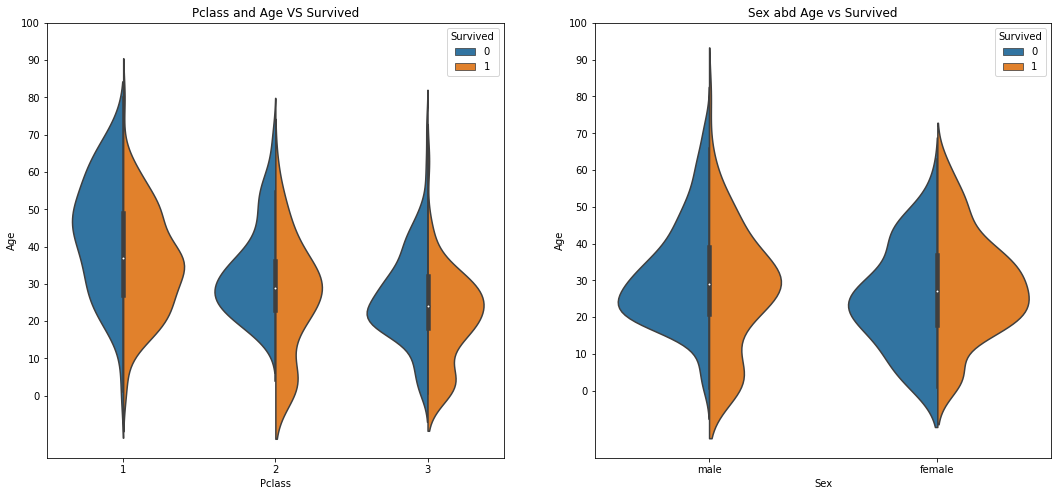

In [89]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
sns.violinplot(x = 'Pclass', y ='Age', hue = 'Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y = 'Age', hue='Survived', data=train,split=True, ax=ax[1])
ax[1].set_title('Sex abd Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [93]:
train['Name'].str

In [94]:
train['Name'].str.extract( '([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

- expand 설명명

In [97]:
import pandas as pd
import numpy as np

s2 = pd.Series(['a_b_c','c_d_e', np.nan, 'f_g_h'], dtype='string')
s2


0    a_b_c
1    c_d_e
2     <NA>
3    f_g_h
dtype: string

In [98]:
s2.str.split('_')

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

In [103]:
s2.str.split('_').str.get(1)

0       b
1       d
2    <NA>
3       g
dtype: object

In [104]:
s2.str.split('_').str[1]

0       b
1       d
2    <NA>
3       g
dtype: object

- 방금 저장된 리스트 중에서 몇번째를 추출할 것인지 정하려면, get또는 []를 사용해서 지정할 수 있다. get()이나 []이나 결과는 같음

- expand를 사용하면 DataFrame으로 쉽게 확장해서 반환이 가능

In [99]:
#True로 하면 DATAFRAME, FALSE로 하면 못 읽어옴?

s2.str.split('_', expand=True) #데이터 프레임 형식으로 확장되었음

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


In [100]:
s2.str.split('_', expand=False)

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

- 원본 Series에 StringDtype이 있으면 출력 열도 모두 StringDtype이 됨.
- n에 원하는 갯수를 입력하여 분할하고자 하는 수를 제한할 수도 있다.

In [ ]:
s2.str.split('_',expand=True,n=1)

In [ ]:
s2.str.split('_',expand=True,n=2)

- replace 함수를 사용해서 정규식을 대체할 수 있음

In [102]:
s3 = pd.Series(['A','B','C', 'Aaba', '', np.nan, 'CABA','dog','cat'], dtype='string')
s3

0       A
1       B
2       C
3    Aaba
4        
5    <NA>
6    CABA
7     dog
8     cat
dtype: string

- replace 함수를 활용해서 '^.a|dog'에 해당하는 문자 영역을 'XX-XX'로 바꿀 수 있다.

In [ ]:
#.을 안찍으면 대문자 소문자 관계없음 
#| or 

In [108]:
s3.str.replace('^.a|dog','XX-XX',case=False)

<ipython-input-108-79daf3abf2eb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  s3.str.replace('^.a|dog','XX-XX',case=False)


0          A
1          B
2          C
3    XX-XXba
4           
5       <NA>
6    XX-XXBA
7      XX-XX
8     XX-XXt
dtype: string

In [109]:
s3.str.replace('^a|dog','XX-XX',case=False)

<ipython-input-109-b0c65ec601bf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  s3.str.replace('^a|dog','XX-XX',case=False)


0       XX-XX
1           B
2           C
3    XX-XXaba
4            
5        <NA>
6        CABA
7       XX-XX
8         cat
dtype: string

- 정규식을 적용하려면, 약간의 주의점이 필요함.
- '$'의 정규표현식 의미로 인해 이슈가 발생하기도 함.

In [110]:
dollars = pd.Series(['12','-$10','$10,000'],dtype='string')
dollars

0         12
1       -$10
2    $10,000
dtype: string

- 단순하게 '$'를 공백으로 변경하는 코드를 실행해본다.

In [111]:
dollars.str.replace('$','')

<ipython-input-111-a37891b046c2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dollars.str.replace('$','')


0        12
1       -10
2    10,000
dtype: string

- '$'가 사라짐.
    - 하지만, '-$'문자까지 추가해서 변경을 해보자!

In [112]:
dollars.str.replace('-$','')

<ipython-input-112-f7d07c483588>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dollars.str.replace('-$','')


0         12
1       -$10
2    $10,000
dtype: string

- 변경되지 않고 그대로 있다.
    - 1개 이상의 패턴인 경우에는 특수문자를 피해야 함.
    - 위의 방식을 정규표현식으로 바꿔서 표현을 해보면,

In [113]:
dollars.str.replace(r'-\$','-')

<ipython-input-113-f6a3105ca7ba>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dollars.str.replace(r'-\$','-')


0         12
1        -10
2    $10,000
dtype: string

- 문자열을 문자 그대로 대체하려면(str.replace()와 동일) 각 문자를 벗어나게 하지 않고 옵션인 regex 파라미터를 False로 설정해야 함.

In [114]:
dollars.str.replace(r'-\$','-',regex = False)

0         12
1       -$10
2    $10,000
dtype: string

In [ ]:
one hot encoding